In [16]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
np.random.seed(1)

paris_listings=pd.read_csv("Data/paris_airbnb.csv")

In [17]:
#Supprimer les symboles de dollar $ et les virgules de la colonne cible price, puis la convertir en type float
# Remove dollar signs and commas, then convert to float
paris_listings['price'] = paris_listings['price'].str.replace(',', '').str.replace('$', '').astype('float')


In [18]:
paris_listings

,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,city,zipcode,state,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews
0,100%,NaN,1.0,48.83349,2.31852,Paris,75014,Île-de-France,2,Entire home/apt,0.0,1.0,0.0,75.0,$50.00,$0.00,3,15,8
1,100%,NaN,1.0,48.85100,2.35869,Paris,75004,Ile-de-France,2,Entire home/apt,0.0,1.0,1.0,115.0,$36.00,$0.00,1,90,173
2,100%,NaN,2.0,48.85758,2.35275,Paris,75004,Île-de-France,4,Entire home/apt,2.0,1.0,2.0,115.0,$50.00,$200.00,10,23,243
3,100%,NaN,1.0,48.86528,2.39326,Paris,75020,Ile-de-France,3,Entire home/apt,1.0,1.0,1.0,90.0,NaN,NaN,3,365,1
4,67%,NaN,3.0,48.85899,2.34735,Paris,75001,Île-de-France,2,Entire home/apt,1.0,1.0,1.0,75.0,$200.00,"$1,500.00",180,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,100%,NaN,2.0,48.87901,2.29526,Paris,75017,Île-de-France,2,Entire home/apt,0.0,1.0,1.0,55.0,$45.00,$400.00,150,1125,0
7996,NaN,NaN,1.0,48.88903,2.35271,Paris,75018,Île-de-France,4,Entire home/apt,1.0,1.0,2.0,60.0,$20.00,$100.00,3,1125,4
7997,100%,NaN,1.0,48.85313,2.34146,Paris,75006,Île-de-France,2,Entire home/apt,1.0,1.0,1.0,60.0,$30.00,$0.00,2,10,25
7998,NaN,NaN,1.0,48.88066,2.33639,Paris,75009,Île-de-France,2,Entire home/apt,NaN,1.0,1.0,58.0,NaN,$200.00,3,9,57


In [19]:
# Mélange des lignes 
df = pd.DataFrame(np.random.permutation(paris_listings.values), columns=paris_listings.columns)
df = df.reset_index(drop=True)
print(df)

#or paris_listings = paris_listings.sample(frac=1, random_state=1).reset_index(drop=True)



     host_response_rate host_acceptance_rate host_listings_count  latitude  \
0                   NaN                  NaN                 1.0  48.88285   
1                   NaN                  NaN                 1.0  48.86006   
2                  100%                  NaN                 3.0  48.88794   
3                   60%                  NaN                 1.0  48.88868   
4                   90%                  NaN                 1.0  48.88686   
...                 ...                  ...                 ...       ...   
7995                NaN                  NaN                 1.0  48.84012   
7996                NaN                  NaN                 1.0  48.87754   
7997                NaN                  NaN                 1.0  48.84617   
7998                65%                  NaN                93.0  48.85522   
7999                NaN                  NaN                 1.0  48.87768   

     longitude   city zipcode          state accommodates      

In [20]:
split_one=df.iloc[:4000]
split_two=df.iloc[4000:]



Validation croisée Holdout

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one

# Step 1: Initialize the KNN regressor with default parameters (k=5, algorithm='auto')
knn = KNeighborsRegressor()

# Step 2: Train the model using 'accommodates' from train_one and 'price' as the target
knn.fit(train_one[['accommodates']], train_one['price'])

# Step 3: Predict on test_one using the trained model
predictions1 = knn.predict(test_one[['accommodates']])

# Step 4: Calculate the RMSE
iteration_one_rmse = np.sqrt(mean_squared_error(test_one['price'], predictions1))
print("Iteration One RMSE:", iteration_one_rmse)


Iteration One RMSE: 90.35054908521586


In [22]:
knn.fit(train_two[['accommodates']], train_two['price'])
predictions2=knn.predict(test_two[['accommodates']])
iteration_two_rmse=np.sqrt(mean_squared_error(test_two['price'],predictions2))
print("Iteration Two RMSE:",iteration_two_rmse)

Iteration Two RMSE: 115.99320618036214


In [23]:
avg_rmse=np.mean([iteration_one_rmse,iteration_two_rmse])
avg_rmse

103.171877632789

on a croisé les 2 parties de df pour verifier l overfitting: chnager les donnees pour le modéle et voir si le rmse change .
le rmse donne la perfermance globale du modéle 

Validation croisée des K-Fold


In [24]:
paris_listings['fold']=None 

paris_listings.loc[0:1600,'fold']=1
paris_listings.loc[1600:3200 ,'fold']=2
paris_listings.loc[3200:4800, 'fold']=3
paris_listings.loc[4800:6400, 'fold']=4
paris_listings.loc[6400:8000, 'fold']=5

fold_counts = paris_listings['fold'].value_counts()
print("Fold distribution:\n", fold_counts)



Fold distribution:
 fold
1    1600
2    1600
3    1600
4    1600
5    1600
Name: count, dtype: int64


In [27]:
train_set = paris_listings[paris_listings['fold'] != 1]
test_set = paris_listings[paris_listings['fold'] == 1]

knn.fit(train_set[['accommodates']], train_set['price'])
labels = knn.predict(test_set[['accommodates']])


fold_one_rmse = np.sqrt(mean_squared_error(test_set['price'], labels))
print("Predicted labels:\n", labels)
print("RMSE for Fold 1:", fold_one_rmse)


Predicted labels:
 [ 68.6  68.6  84.  ...  84.   68.6 217.2]
RMSE for Fold 1: 97.3811369054603


In [29]:
train_set2 = paris_listings[paris_listings['fold'] != 2]
test_set2 = paris_listings[paris_listings['fold'] == 2]

knn.fit(train_set2[['accommodates']], train_set2['price'])
labels2 = knn.predict(test_set2[['accommodates']])


fold_two_rmse = np.sqrt(mean_squared_error(test_set2['price'], labels2))
print("Predicted labels:\n", labels2)
print("RMSE for Fold 2:", fold_two_rmse)


Predicted labels:
 [ 95.  113.6  85.8 ...  66.8 113.6  95. ]
RMSE for Fold 1: 89.19670467567734


In [30]:
train_set3 = paris_listings[paris_listings['fold'] != 3]
test_set3 = paris_listings[paris_listings['fold'] == 3]

knn.fit(train_set3[['accommodates']], train_set3['price'])
labels3 = knn.predict(test_set3[['accommodates']])


fold_three_rmse = np.sqrt(mean_squared_error(test_set3['price'], labels3))
print("Predicted labels:\n", labels2)
print("RMSE for Fold 3:", fold_three_rmse)


Predicted labels:
 [ 95.  113.6  85.8 ...  66.8 113.6  95. ]
RMSE for Fold 1: 151.2883885993899


Partie 2

In [31]:
def train_and_validate(df, folds):
    fold_rmses = []
    for fold in folds:
        # Separate the training and testing sets for the current fold
        train_set = df[df['fold'] != fold]
        test_set = df[df['fold'] == fold]

        # Initialize the KNN regressor
        knn = KNeighborsRegressor()

        # Train the model
        knn.fit(train_set[['accommodates']], train_set['price'])

        # Make predictions on the test set
        predictions = knn.predict(test_set[['accommodates']])

        # Calculate the RMSE for this fold
        rmse = np.sqrt(mean_squared_error(test_set['price'], predictions))
        fold_rmses.append(rmse)

    return fold_rmses

# Apply the function to paris_listings DataFrame
rmses = train_and_validate(paris_listings, [1, 2, 3, 4, 5])

# Calculate the average RMSE across all folds
avg_rmse = np.mean(rmses)

# Print the list of RMSEs and the average RMSE
print("RMSEs for each fold:", rmses)
print("Average RMSE:", avg_rmse)

RMSEs for each fold: [97.3811369054603, 89.19670467567734, 151.2883885993899, 76.2122645969794, 83.62573407749555]
Average RMSE: 99.54084577100049


Partie 3

Exécuter une validation croisée des K-Fold en utilisant Scikit-Learn

In [35]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)
knn=KNeighborsRegressor()

knn.fit(paris_listings[['accommodates']],paris_listings['price'])
# Step 3: Perform K-Fold cross-validation and calculate MSE for each fold
# Use make_scorer with mean_squared_error to get negative MSE scores
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mses = cross_val_score(knn, paris_listings[['accommodates']], paris_listings['price'], scoring=mse_scorer, cv=kf)

# Step 4: Calculate the average RMSE by taking the square root of the absolute MSE values
rmses = np.sqrt(np.abs(mses))
avg_rmse = np.mean(rmses)

# Display results
print("MSEs for each fold:", mses)
print("RMSEs for each fold:", rmses)
print("Average RMSE:", avg_rmse)

MSEs for each fold: [ -6546.241375 -29730.6649    -6443.279975  -9787.031875  -5567.80275 ]
RMSEs for each fold: [ 80.90884609 172.42582434  80.27004407  98.92942876  74.6177107 ]
Average RMSE: 101.43037079170577


In [36]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Étape 2: Définition des Folds
num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

# Boucle d'Évaluation
for fold in num_folds:
    # Créer une instance de KFold
    kf = KFold(n_splits=fold, shuffle=True, random_state=1)
    
    # Initialiser le modèle KNN
    knn = KNeighborsRegressor()
    
    # Évaluer le modèle avec cross_val_score
    mses = cross_val_score(knn, paris_listings[['accommodates']], paris_listings['price'], 
                           scoring='neg_mean_squared_error', cv=kf)
    
    # Convertir les valeurs MSE négatives en valeurs MSE positives
    mse_positive = -mses
    
    # Calculer RMSE et ses statistiques
    rmse = np.sqrt(mse_positive)
    avg_rmse = np.mean(rmse)
    std_rmse = np.std(rmse)
    
    # Affichage des Résultats
    print(f"{fold} folds: avg RMSE: {avg_rmse:.2f}, std RMSE: {std_rmse:.2f}")


3 folds: avg RMSE: 99.87, std RMSE: 22.95
5 folds: avg RMSE: 101.43, std RMSE: 36.43
7 folds: avg RMSE: 113.93, std RMSE: 45.09
9 folds: avg RMSE: 96.26, std RMSE: 36.99
10 folds: avg RMSE: 94.67, std RMSE: 37.96
11 folds: avg RMSE: 110.75, std RMSE: 56.35
13 folds: avg RMSE: 103.24, std RMSE: 48.94
15 folds: avg RMSE: 100.43, std RMSE: 46.39
17 folds: avg RMSE: 94.42, std RMSE: 40.90
19 folds: avg RMSE: 92.94, std RMSE: 42.80
21 folds: avg RMSE: 103.70, std RMSE: 54.16
23 folds: avg RMSE: 98.27, std RMSE: 48.12


Partie 4

C:\Users\21655\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\21655\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Accuracy pour chaque fold: [0.9010989  0.92307692 0.95604396 0.97802198 0.95604396]
Accuracy moyenne: 0.9428571428571428
Matrice de Confusion :
 [[37  5]
 [ 0 72]]


C:\Users\21655\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


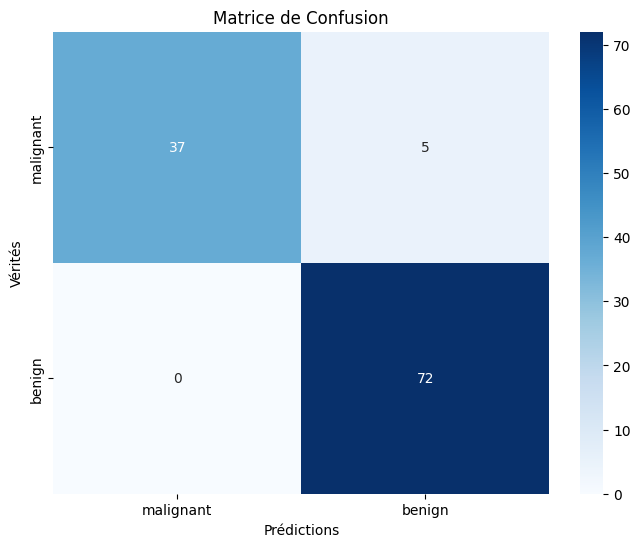

Accuracy sur l'ensemble de test: 0.956140350877193


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Chargement des Données
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Prétraitement et Division des Données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 3. Création du Modèle
log_reg = LogisticRegression(max_iter=1000)  # Augmentation du nombre maximum d'itérations si nécessaire

# 4. Validation Croisée
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
print("Accuracy pour chaque fold:", cv_scores)
print("Accuracy moyenne:", np.mean(cv_scores))

# 5. Entraînement du Modèle
log_reg.fit(X_train, y_train)

# Prédictions
y_pred = log_reg.predict(X_test)

# Matrice de Confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de Confusion :\n", cm)

# Visualisation de la Matrice de Confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.show()

# Évaluation Finale
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy sur l'ensemble de test:", accuracy)
